# 제너레이터


제너레이터는 반복자(itrator)와 같은 루프의 작용을 컨트롤 하기 위해 쓰이는 특별한 함수 또는 루틴이다.  
사실 모든 제너레이터는 반복자이다. 제너레이터는 배열이나 리스트를 리턴하는 함수와 비슷하며, 호출할 수 있는 파라미터를 가지고 있고, 연속적인 값들을 만들어 낸다. 

하지만 한번에 모든 값을 포함한 배열을 만들어서 리턴하는 대신에 yield 구문을 이용해 한 번 호출될 때마다 하나의 값만을 리턴하고, 이런 이유로 일반 반족자에 비해 아주 작은 메모리만 필요로 한다. 

즉, 제너레이터는 반복자와 같은 역할을 하는 함수이지만 메모리 관리 측면에서 차이가 존재한다.

In [3]:
def square_numbers(nums):
    result = []
    for i in nums:
        result.append(i * i)
    return result

my_nums = square_numbers([1, 2, 3, 4, 5])

print(my_nums)

[1, 4, 9, 16, 25]


In [9]:
def square_numbers(nums):
    for i in nums:
        yield[i * i]

my_nums = square_numbers([1,2,3,4,5]) #1

print(my_nums)

<generator object square_numbers at 0x000002A9F3153F68>


제너레이터 객체가 리턴  
자신이 리턴할 모든 값을 메모리에 저장하지 않기 때문에 조금 전 일반 함수의 결과와 같이 한번에 리스트로 보이지 않는 것  
제너레이터는 한 번 호출될 때마다 하나의 값만을 전달(yield)  
`#1 까지는 아무런 계산을 하지 않고 누군가가 다음 값에 대해서 물어보기를 기다리는 상태 

In [10]:
next(my_nums)

[1]

In [11]:
def square_numbers(nums):
    for i in nums:
        yield[i * i]

my_nums = square_numbers([1,2,3,4,5]) #1

print(next(my_nums))
print(next(my_nums))
print(next(my_nums))
print(next(my_nums))
print(next(my_nums))
print(next(my_nums))

[1]
[4]
[9]
[16]
[25]


StopIteration: 

In [12]:
def square_numbers(nums):
    for i in nums:
        yield[i * i]

my_nums = square_numbers([1,2,3,4,5]) #1

for num in my_nums:
    print(num)

[1]
[4]
[9]
[16]
[25]


for 루프는 자신이 어디서 멈춰야 하는지를 알고 있다. (StopIteration 에러시 정지)

### list comprehension 활용

#### 반복형(Iteration)

In [15]:
my_nums = [ i*i for i in [1,2,3,4,5]]

print(my_nums)

for num in my_nums:
    print(num)

[1, 4, 9, 16, 25]
1
4
9
16
25


In [16]:
my_nums = ( i*i for i in [1,2,3,4,5])

print(my_nums)

for num in my_nums:
    print(num)

<generator object <genexpr> at 0x000002A9F3153EB8>
1
4
9
16
25


한번에 제너레이터 전체 데이터를 보기

In [17]:
my_nums = ( i*i for i in [1,2,3,4,5])

print(my_nums)
print(list(my_nums))

<generator object <genexpr> at 0x000002A9F3153D58>
[1, 4, 9, 16, 25]


리스트로 변형할 시 제너레이터가 가지고 있던 장점이 모두 사라짐
* 가장 큰 장점은 퍼포먼스 => 제너레이터는 모든 결과값을 메모리에 저장하지 않기 때문에 더 좋은 퍼포먼스를 냄

In [24]:
from __future__ import division
import os
import psutil
import random
import time

names = ['최용호', '지길정', '진영욱', '김세훈', '오세훈', '김민우']
majors = ['컴퓨터 공학', '국문학', '영문학', '수학', '정치']

process = psutil.Process(os.getpid())
mem_before = process.memory_info().rss / 1024 / 1024


def people_list(num_people):
    result = []
    for i in range(num_people):
        person = {
            'id': i,
            'name': random.choice(names),
            'major': random.choice(majors)
        }
        result.append(person)
    return result


def people_generator(num_people):
    for i in range(num_people):
        person = {
            'id': i,
            'name': random.choice(names),
            'major': random.choice(majors)
        }
        yield person

t1 = time.clock()
people = people_list(1000000)  #1 people_list를 호출
t2 = time.clock()
mem_after = process.memory_info().rss / 1024 / 1024
total_time = t2 - t1

print ('시작 전 메모리 사용량: {} MB'.format(mem_before))
print ('종료 후 메모리 사용량: {} MB'.format(mem_after))
print ('총 소요된 시간: {:.6f} 초'.format(total_time))

시작 전 메모리 사용량: 49.94921875 MB
종료 후 메모리 사용량: 321.73046875 MB
총 소요된 시간: 1.792870 초


In [26]:
# -*- coding: utf-8 -*-
from __future__ import division
import os
import psutil
import random
import time

names = ['최용호', '지길정', '진영욱', '김세훈', '오세훈', '김민우']
majors = ['컴퓨터 공학', '국문학', '영문학', '수학', '정치']

process = psutil.Process(os.getpid())
mem_before = process.memory_info().rss / 1024 / 1024


def people_list(num_people):
    result = []
    for i in range(num_people):
        person = {
            'id': i,
            'name': random.choice(names),
            'major': random.choice(majors)
        }
        result.append(person)
    return result


def people_generator(num_people):
    for i in range(num_people):
        person = {
            'id': i,
            'name': random.choice(names),
            'major': random.choice(majors)
        }
        yield person

t1 = time.clock()
people = people_generator(1000000)  #1 people_generator를 호출
t2 = time.clock()
mem_after = process.memory_info().rss / 1024 / 1024
total_time = t2 - t1
print ('시작 전 메모리 사용량: {} MB'.format(mem_before))
print ('종료 후 메모리 사용량: {} MB'.format(mem_after))
print ('총 소요된 시간: {:.6f} 초'.format(total_time))

시작 전 메모리 사용량: 50.29296875 MB
종료 후 메모리 사용량: 50.29296875 MB
총 소요된 시간: 0.000027 초


In [27]:
def my_gen():
    n = 1
    print('This is printed first')
    # Generator function contains yield statements
    yield n

    n += 1
    print('This is printed second')
    yield n

    n += 1
    print('This is printed at last')
    yield n

In [40]:
a = my_gen()

print(next(a))
print(next(a))
print(next(a))

This is printed first
1
This is printed second
2
This is printed at last
3


In [34]:
def gen(x):
    print(x)
    print("gen 함수가 시작")
    print("---"*10)
    for i in range(x):
        i = i+3
        print(locals())
        print("내부 for문입니다.")
        yield i
        
for i in gen(5):
    print(i)
    print("x는 : ",i)
    print("i는 : ",j)
    print("외부 for문입니다.", j)
    print("---"*10)

5
gen 함수가 시작
------------------------------
{'i': 3, 'x': 5}
내부 for문입니다.
3
x는 :  3


NameError: name 'j' is not defined

In [14]:
def main():
    def countdown(n):
        while n > 0:
            yield n
            n -= 1
    for i in countdown(5):
        print(i, end=" ")


In [15]:
main()

5 4 3 2 1 

In [4]:
import dis

In [9]:
dis.dis(main())

5 4 3 2 1   2           0 LOAD_CONST               1 (<code object countdown at 0x000001E3DC829C00, file "<ipython-input-6-fad6690015d1>", line 2>)
              2 LOAD_CONST               2 ('main.<locals>.countdown')
              4 MAKE_FUNCTION            0
              6 STORE_FAST               0 (countdown)

  6           8 SETUP_LOOP              28 (to 38)
    -->      10 LOAD_GLOBAL              0 (coutdown)
             12 LOAD_CONST               3 (5)
             14 CALL_FUNCTION            1
             16 GET_ITER
        >>   18 FOR_ITER                16 (to 36)
             20 STORE_FAST               1 (i)

  7          22 LOAD_GLOBAL              1 (print)
             24 LOAD_FAST                1 (i)
             26 LOAD_CONST               4 (' ')
             28 LOAD_CONST               5 (('end',))
             30 CALL_FUNCTION_KW         2
             32 POP_TOP
             34 JUMP_ABSOLUTE           18
        >>   36 POP_BLOCK
        >>   38 LOAD_CONST

## yield

파이썬 제너레이터는 특별한 함수 객체로, yield 구문을 통해서 특정 값을 리턴한 후에도 제거되지 않고 방금 리턴한 그 자리에서부터 이어서 계산을 반복하고 다시 값을 내놓을 수 있다.

파이썬 2.5에서 제너레이터 속으로 값을 전달하는 기능이 생김

 (PEP342) 이는 매우 흥미로운 패턴으로 이어지게 되는데, 자신의 위치를 기억하고 있다가 다시 그 자리에서 실행이 가능한 제너레이터의 특성상, 두 개의 제너레이터가 번갈아가면서 제어권을 넘기는 형태의 flow를 생각할 수 있다. 이 때 두 제너레이터는 서브루틴과는 다른 개념으로 관계를 맺게 되고 이런 패턴을 코루틴이라 한다.


즉, 2.5부터 ```yield```는 표현식의 기능을 겸하게 되었고, 이는 대입문의 우변이 될 수 있다는 말이며, '값으로 평가된다'는 말이다.

## 코루틴

값을 입력받을 수 있는 제너레이터를 코루틴이라고 부른다

In [32]:
def printer():
    #1
    while True:
        line = yield  #2
        print(line)

prn = printer()

printer()함수를 호출하여 코루틴을 생성    
생성직후 코루틴의 실행 위치는 #1  
최초로 next()를 호출하면 처음 yield를 만나는 #2의 지점까지 실행    
line = yield는 단순한 바인딩 구문이다.
 - 바인딩 구문은 등호의 우변을 먼저 평가한 후, 그 평가값을 좌변에 연결한다.
 - 우변이 평가되는 시점에 코루틴이 한번 멈추게 되고, 다시 실행될 떄 외부에서 들여온 값으로 yield가 평가된다.
 - 그리고 그 값이 line으로 들어간다.

In [25]:
count = 0
for i in dir(prn):
    print(i, end = "   ")
    count += 1
    print() if count % 5 == 0 else _

__class__   __del__   __delattr__   __dir__   __doc__   
__eq__   __format__   __ge__   __getattribute__   __gt__   
__hash__   __init__   __init_subclass__   __iter__   __le__   
__lt__   __name__   __ne__   __new__   __next__   
__qualname__   __reduce__   __reduce_ex__   __repr__   __setattr__   
__sizeof__   __str__   __subclasshook__   close   gi_code   
gi_frame   gi_running   gi_yieldfrom   send   throw   


제너레이터로 생성된 객체는 `__next__()`, `send()` 라는 두 개의 메소드를 갖게 된다.  
함수에 전달되었을 때 호출되는 메소드로 다음번 yield 구문까지 실행하라는 신호를 제너레이터에게 전달한다.  
send() 메소드는 `__next()__`와 거의 동일한데, 차이가 있다면 이 시점에 코루틴 내부로 값을 밀어넣을 수 있다.

코루틴 주요 메서드
 - coroutine.send(value) : 코루틴을 시작하거나 다시 시작한다. value가 None이면 시작, None이 아니면 값을 처리
 - coroutine.throw(type [, value[, tracebakc]]) : 코루틴이 지정된 예욀르 발생시킨다. 이 메서드는 코루틴을 일시 중단시키는 반복자의 throw()메서드에 위임한다.  
 - coroutine.close() : 코루틴 자체를 종료한다.

In [26]:
# 코루틴 시작
next(prn)
# prn.send(None) # None값을 밀어넣어 코루틴을 실행함.

In [27]:
prn.send(1)

1


In [35]:
# 코루틴 실행 과정을 자동으로 만들어주는 데코레이터
from functools import wraps

def coroutine(func):
    @wraps(func)
    def start(*args, **kwarg):
        cr = func(*args, **kwargs)
        cr.send(None)
        return cr
    return start

In [39]:
prn = printer()
prn.send('hello world')

TypeError: can't send non-None value to a just-started generator

왜 데코레이터가 정상적으로 작동하지 않을까?

In [43]:
def printer():
    #1
    while True:
        yield 1  #2
        

prn = printer()

In [44]:
count = 0
for i in dir(prn):
    print(i, end = "   ")
    count += 1
    print() if count % 5 == 0 else _

__class__   __del__   __delattr__   __dir__   __doc__   
__eq__   __format__   __ge__   __getattribute__   __gt__   
__hash__   __init__   __init_subclass__   __iter__   __le__   
__lt__   __name__   __ne__   __new__   __next__   
__qualname__   __reduce__   __reduce_ex__   __repr__   __setattr__   
__sizeof__   __str__   __subclasshook__   close   gi_code   
gi_frame   gi_running   gi_yieldfrom   send   throw   


In [45]:
def test2():
    for i in range(10):
        yield i * 2


In [46]:
test2()

<generator object test2 at 0x000001E3DC86BD58>

In [47]:
for i in test2():
    print(i)

0
2
4
6
8
10
12
14
16
18


In [48]:
def callee():
    yield 1
    yield 2
# 		
x = callee()
i = next(x)
i = next(x)

#### 실행순서
Caller
> i = next()    
제어권 넘김  

Callee
> yield 1  
값 1 반환  

Caller
> i = next()    
제어권 넘김  

Callee 
> yield 2  
값 2 반환  

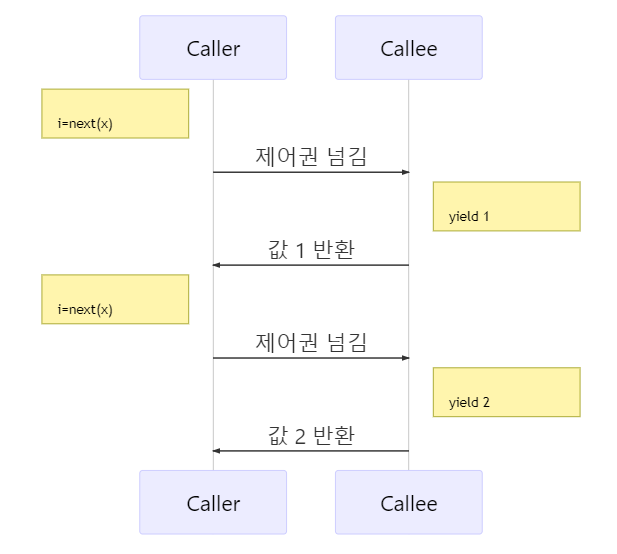

In [49]:
def coroutine1():
    print('callee 1')
    x = yield 1
    print('callee 2: %d' % x)
    x = yield 2
    print('callee 3: %d' % x)
# 	
task = coroutine1()
i = next(task)    # callee 1 출력, i는 1이 됨 
i = task.send(10) # callee 2: 10 출력, i는 2가 됨 
task.send(20)     # callee 3: 20 출력 후 StopIteration exception 발생

callee 1
callee 2: 10
callee 3: 20


StopIteration: 

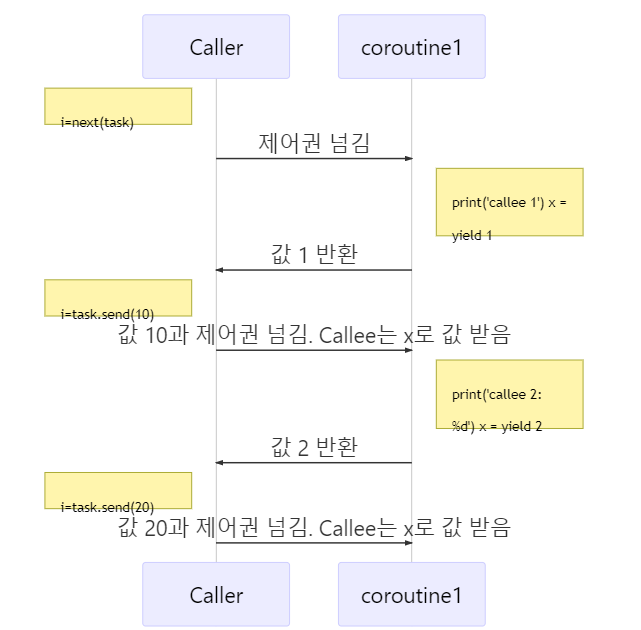